### Importing the required libraries to perform Logistic Regression

In [1]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings("ignore")

### Step 1: Reading and Understanding the Data

In [2]:
leads_scoring=pd.read_csv("./Leads.csv")

### Inspecting the data

In [3]:
leads_scoring.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

#### Replacing the Select option from categorical variables as it is esentially just a null value 

In [5]:
leads_scoring=leads_scoring.replace('Select',np.nan)

In [6]:
leads_scoring.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Dropping duplicate records

In [7]:
leads_scoring.drop_duplicates(inplace=True)

**Missing values along rows**

In [8]:
leads_scoring.isnull().sum(axis=1)

0       5
1       5
2       1
3       1
4       2
5       9
6       0
7       9
8       6
9       5
10      2
11      3
12      2
13      3
14      5
15      4
16      9
17      4
18      3
19      4
20      1
21      3
22      0
23      1
24      1
25      1
26      1
27      0
28      4
29      1
       ..
9210    0
9211    0
9212    1
9213    6
9214    8
9215    6
9216    1
9217    4
9218    5
9219    1
9220    2
9221    6
9222    0
9223    1
9224    1
9225    1
9226    5
9227    0
9228    6
9229    1
9230    1
9231    0
9232    1
9233    9
9234    1
9235    1
9236    1
9237    1
9238    5
9239    1
Length: 9240, dtype: int64

**Missing values along columns**

In [9]:
round(100*leads_scoring.isnull().sum()/len(leads_scoring.index),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Treatment of missing values

**Dropping collumn with 70% or higher percentage of empty records** 

In [10]:
leads_scoring=leads_scoring.drop(['How did you hear about X Education','Lead Profile'],axis=1)

#### Removing Information about customer that is for company purpose and doesn't serve any use in analysis

In [11]:
leads_scoring=leads_scoring.drop(['Prospect ID','Lead Number'],axis=1)

In [12]:
#Finding the number of unique values under each collumn
leads_scoring.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

**Dropping Collumns with single value as it doesn't serve any use for analysis**

In [13]:
leads_scoring=leads_scoring.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [14]:
leads_scoring.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

#### Imputing Missing values in Lead Quality

In [15]:
leads_scoring.groupby(by='Lead Quality').count()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Tags,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
Lead Quality,,,,,,,,,,,,,,,,,,,,,
High in Relevance,637,632,637,637,637,597,637,597,611,394,...,637,637,635,528,375,375,375,375,637,637
Low in Relevance,583,583,583,583,583,556,583,556,557,431,...,583,583,581,540,352,352,352,352,583,583
Might be,1560,1545,1560,1560,1560,1533,1560,1533,1539,1207,...,1560,1560,1550,1013,848,848,848,848,1560,1560
Not Sure,1092,1090,1092,1092,1092,1087,1092,1087,1087,986,...,1092,1092,1079,815,605,605,605,605,1092,1092
Worst,601,601,601,601,601,601,601,601,601,478,...,601,601,601,393,269,269,269,269,601,601


In [16]:
round(100*(leads_scoring['Lead Quality'].isnull().sum()/len(leads_scoring.index)),2)

51.59

There are more than 50% missing values in 'Lead Quality' column because of no assignment by X Education employee.
We don't have any information about these missing fields hence replacing them by 'Unassigned'

In [17]:
leads_scoring['Lead Quality']=leads_scoring['Lead Quality'].replace(np.nan,"Unassigned")

In [18]:
round(100*leads_scoring.isnull().sum()/len(leads_scoring.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

#### Inspecting & Treating missing values in 'Asymmetrique Profile Index','Asymmetrique Profile Score'

In [19]:
leads_scoring.groupby(['Asymmetrique Activity Index']).Converted.count()

Asymmetrique Activity Index
01.High       821
02.Medium    3839
03.Low        362
Name: Converted, dtype: int64

In [20]:
leads_scoring.groupby(['Asymmetrique Profile Index']).Converted.count()

Asymmetrique Profile Index
01.High      2203
02.Medium    2788
03.Low         31
Name: Converted, dtype: int64

In [21]:
leads_scoring.groupby(['Asymmetrique Activity Score']).Converted.count()

Asymmetrique Activity Score
7.0        1
8.0        4
9.0        9
10.0      57
11.0      95
12.0     196
13.0     775
14.0    1771
15.0    1293
16.0     467
17.0     349
18.0       5
Name: Converted, dtype: int64

In [22]:
leads_scoring.groupby(['Asymmetrique Profile Score']).Converted.count()

Asymmetrique Profile Score
11.0       9
12.0      22
13.0     204
14.0     226
15.0    1759
16.0     599
17.0     579
18.0    1071
19.0     245
20.0     308
Name: Converted, dtype: int64

#### Dropping Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score                       

In [23]:
leads_scoring=leads_scoring.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],axis=1)

In [24]:
round(100*leads_scoring.isnull().sum()/len(leads_scoring.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

#### Treating City Collumn missing values

In [25]:
round(100*(leads_scoring.groupby('City').City.count()/len(leads_scoring.index)),2)

City
Mumbai                         34.87
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Thane & Outskirts               8.14
Tier II Cities                  0.80
Name: City, dtype: float64

#### 'City' column has approximately 40% missing values. The Collumn has maximum occurence of 'Mumbai' and other values have very few occurences .Thus we cannot impute the collumn with any value and decide to drop it as well

In [26]:
leads_scoring.drop('City',axis=1,inplace=True)

In [27]:
round(100*leads_scoring.isnull().sum()/len(leads_scoring.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

#### Treating Tags collumn missing values

In [28]:
round(100*(leads_scoring.groupby('Tags').Tags.count()/len(leads_scoring.index)),2)

Tags
Already a student                                     5.03
Busy                                                  2.01
Closed by Horizzon                                    3.87
Diploma holder (Not Eligible)                         0.68
Graduation in progress                                1.20
In confusion whether part time or DLP                 0.05
Interested  in full time MBA                          1.27
Interested in Next batch                              0.05
Interested in other courses                           5.55
Lateral student                                       0.03
Lost to EINS                                          1.89
Lost to Others                                        0.08
Not doing further education                           1.57
Recognition issue (DEC approval)                      0.01
Ringing                                              13.02
Shall take in the next coming month                   0.02
Still Thinking                                     

Since we don't know what might be the status of missing value 'Tags', it is better to replace them with value 'Unknown'

In [29]:
leads_scoring['Tags']=leads_scoring['Tags'].replace(np.nan,'Unknown')

In [30]:
round(100*leads_scoring.isnull().sum()/len(leads_scoring.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

#### Treating Specialization collumn missing values

In [31]:
round(100*(leads_scoring.groupby('Specialization').Specialization.count()/len(leads_scoring.index)),2)

Specialization
Banking, Investment And Insurance     3.66
Business Administration               4.36
E-Business                            0.62
E-COMMERCE                            1.21
Finance Management                   10.56
Healthcare Management                 1.72
Hospitality Management                1.23
Human Resource Management             9.18
IT Projects Management                3.96
International Business                1.93
Marketing Management                  9.07
Media and Advertising                 2.20
Operations Management                 5.44
Retail Management                     1.08
Rural and Agribusiness                0.79
Services Excellence                   0.43
Supply Chain Management               3.78
Travel and Tourism                    2.20
Name: Specialization, dtype: float64

37% values are missing in 'Specialization' & we don't have any information about those missing value prospects. Hence replacing the null values with 'Specialization Not given'

In [32]:
leads_scoring['Specialization']=leads_scoring['Specialization'].replace(np.nan,'Specialization Not given')

In [33]:
round(100*leads_scoring.isnull().sum()/len(leads_scoring.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

#### Treating What is your current occupation missing values

In [34]:
round(100*(leads_scoring.groupby('What is your current occupation')['What is your current occupation'].count()/len(leads_scoring.index)),2)

What is your current occupation
Businessman              0.09
Housewife                0.11
Other                    0.17
Student                  2.27
Unemployed              60.61
Working Professional     7.64
Name: What is your current occupation, dtype: float64

60% of Data is Unemployed, however it'd be wrong to impute this value ,hence we will impute it with Other

In [35]:
leads_scoring['What is your current occupation']=leads_scoring['What is your current occupation'].replace(np.nan,'Other')

In [36]:
round(100*leads_scoring.isnull().sum()/len(leads_scoring.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

#### Treating What matters most to you in choosing a course collumn missing values

In [37]:
round(100*(leads_scoring.groupby('What matters most to you in choosing a course')['What matters most to you in choosing a course'].count()/len(leads_scoring.index)),2)

What matters most to you in choosing a course
Better Career Prospects      70.65
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

In 'What matters most to you in choosing a course' 71% values are 'Better Career Prospects'. Missing values are 29%. It makes sense both logically as well as business point of view to impute the collumn value with 'Better Career Prospects'

In [38]:
leads_scoring['What matters most to you in choosing a course']=leads_scoring['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [39]:
round(100*(leads_scoring.groupby('What matters most to you in choosing a course')['What matters most to you in choosing a course'].count()/len(leads_scoring.index)),2)

What matters most to you in choosing a course
Better Career Prospects      99.97
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

#### After imputing the values we can see that 99.97% of the collumn value is Better Career Prospects . Thus it can be dropped as the main reason that customers take course is for Better Career Prospects and doesn't help in analysis

In [40]:
leads_scoring.drop('What matters most to you in choosing a course',axis=1,inplace=True)

'What is your current occupation' has ~29% missing values. 60% prospects are Unemployed. But it is unsafe to replace the missing fields with 'Unemployed'
Hence replacing the missing field with 'Other'

In [41]:
round(100*leads_scoring.isnull().sum()/len(leads_scoring.index),2)

Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                   26.63
Specialization                             0.00
What is your current occupation            0.00
Search                                     0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
Tags                                       0.00
Lead Quality                               0.00
A free copy of Mastering The Interview  

#### Treating Country collumn missing values

In [42]:
round(100*(leads_scoring.groupby('Country').Country.count()/len(leads_scoring.index)),2)

Country
Asia/Pacific Region      0.02
Australia                0.14
Bahrain                  0.08
Bangladesh               0.02
Belgium                  0.02
Canada                   0.04
China                    0.02
Denmark                  0.01
France                   0.06
Germany                  0.04
Ghana                    0.02
Hong Kong                0.08
India                   70.26
Indonesia                0.01
Italy                    0.02
Kenya                    0.01
Kuwait                   0.04
Liberia                  0.01
Malaysia                 0.01
Netherlands              0.02
Nigeria                  0.04
Oman                     0.06
Philippines              0.02
Qatar                    0.11
Russia                   0.01
Saudi Arabia             0.23
Singapore                0.26
South Africa             0.04
Sri Lanka                0.01
Sweden                   0.03
Switzerland              0.01
Tanzania                 0.01
Uganda                   0.02
Un

Country India is the maximum occuring value in Collumn Country thus imputing missing values with this value

In [43]:
leads_scoring['Country']=leads_scoring['Country'].replace(np.nan,'India') 

In [44]:
round(100*leads_scoring.isnull().sum()/len(leads_scoring.index),2)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Country                                   0.00
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
Tags                                      0.00
Lead Quality                              0.00
A free copy of Mastering The Interview    0.00
Last Notable 

#### Inspecting & Treating missing values in 'Lead Source'

In [45]:
round(100*(leads_scoring.groupby('Page Views Per Visit')['Page Views Per Visit'].count()/len(leads_scoring.index)),2)

Page Views Per Visit
0.00     23.69
1.00      7.05
1.14      0.02
1.17      0.01
1.19      0.01
1.20      0.05
1.21      0.01
1.22      0.02
1.23      0.02
1.25      0.25
1.27      0.01
1.31      0.01
1.33      0.71
1.38      0.03
1.40      0.12
1.43      0.04
1.45      0.01
1.48      0.01
1.50      3.31
1.54      0.01
1.56      0.02
1.57      0.03
1.60      0.09
1.63      0.01
1.64      0.01
1.67      0.65
1.71      0.04
1.75      0.30
1.78      0.03
1.80      0.14
         ...  
5.00      5.60
5.25      0.02
5.33      0.02
5.40      0.02
5.50      0.23
5.67      0.03
6.00      2.64
6.33      0.01
6.50      0.14
6.67      0.01
6.71      0.01
7.00      1.44
7.50      0.02
8.00      0.93
8.21      0.01
8.33      0.01
8.50      0.01
9.00      0.49
10.00     0.27
11.00     0.19
11.50     0.01
12.00     0.05
12.33     0.01
13.00     0.06
14.00     0.10
14.50     0.01
15.00     0.04
16.00     0.03
24.00     0.01
55.00     0.01
Name: Page Views Per Visit, Length: 114, dtype: float64

0.0 is the maximum occuring values , thus we will impute collumn with the same

In [46]:
leads_scoring['Page Views Per Visit'].replace(np.nan,0.0,inplace=True)

In [47]:
round(100*leads_scoring.isnull().sum()/len(leads_scoring.index),2)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      0.00
Last Activity                             1.11
Country                                   0.00
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
Tags                                      0.00
Lead Quality                              0.00
A free copy of Mastering The Interview    0.00
Last Notable 

#### Treating missing values in Total Visits column 

In [48]:
round(100*(leads_scoring.groupby('TotalVisits')['TotalVisits'].count()/len(leads_scoring.index)),2)

TotalVisits
0.0      23.69
1.0       4.27
2.0      18.18
3.0      14.13
4.0      12.12
5.0       8.47
6.0       5.04
7.0       3.34
8.0       2.42
9.0       1.77
10.0      1.23
11.0      0.93
12.0      0.49
13.0      0.52
14.0      0.39
15.0      0.19
16.0      0.23
17.0      0.17
18.0      0.16
19.0      0.10
20.0      0.13
21.0      0.06
22.0      0.03
23.0      0.06
24.0      0.05
25.0      0.05
26.0      0.02
27.0      0.05
28.0      0.02
29.0      0.02
30.0      0.01
32.0      0.01
41.0      0.01
42.0      0.01
43.0      0.01
54.0      0.01
55.0      0.01
74.0      0.01
115.0     0.01
141.0     0.01
251.0     0.01
Name: TotalVisits, dtype: float64

0.0 is the maximum occuring values , thus we will impute collumn with the same

In [49]:
leads_scoring['TotalVisits'].replace(np.nan,0.0,inplace=True)

In [50]:
round(100*leads_scoring.isnull().sum()/len(leads_scoring.index),2)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               0.00
Total Time Spent on Website               0.00
Page Views Per Visit                      0.00
Last Activity                             1.11
Country                                   0.00
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
Tags                                      0.00
Lead Quality                              0.00
A free copy of Mastering The Interview    0.00
Last Notable 

#### Treating missing values in Last Activity collumn

In [51]:
round(100*(leads_scoring.groupby('Last Activity')['Last Activity'].count()/len(leads_scoring.index)),2)

Last Activity
Approached upfront               0.10
Converted to Lead                4.63
Email Bounced                    3.53
Email Link Clicked               2.89
Email Marked Spam                0.02
Email Opened                    37.20
Email Received                   0.02
Form Submitted on Website        1.26
Had a Phone Conversation         0.32
Olark Chat Conversation         10.53
Page Visited on Website          6.93
Resubscribed to emails           0.01
SMS Sent                        29.71
Unreachable                      1.01
Unsubscribed                     0.66
View in browser link Clicked     0.06
Visited Booth in Tradeshow       0.01
Name: Last Activity, dtype: float64

Replacing nan values with maximum occuring value that is Email Opened

In [52]:
leads_scoring['Last Activity']=leads_scoring['Last Activity'].replace(np.nan,'Email Opened')

In [53]:
round(100*leads_scoring.isnull().sum()/len(leads_scoring.index),2)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               0.00
Total Time Spent on Website               0.00
Page Views Per Visit                      0.00
Last Activity                             0.00
Country                                   0.00
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
Tags                                      0.00
Lead Quality                              0.00
A free copy of Mastering The Interview    0.00
Last Notable 

#### Treating Lead Source missing values

In [54]:
round(100*(leads_scoring.groupby('Lead Source')['Lead Source'].count()/len(leads_scoring.index)),2)

Lead Source
Click2call            0.04
Direct Traffic       27.52
Facebook              0.60
Google               31.04
Live Chat             0.02
NC_EDM                0.01
Olark Chat           18.99
Organic Search       12.49
Pay per Click Ads     0.01
Press_Release         0.02
Reference             5.78
Referral Sites        1.35
Social Media          0.02
WeLearn               0.01
Welingak Website      1.54
bing                  0.06
blog                  0.01
google                0.05
testone               0.01
welearnblog_Home      0.01
youtubechannel        0.01
Name: Lead Source, dtype: float64

In [55]:
#Google is appearing twice in different case letters, removing this inconsistency
leads_scoring['Lead Source']=np.where(leads_scoring['Lead Source']=="google","Google",leads_scoring['Lead Source'])

In [56]:
round(100*(leads_scoring['Lead Source'].value_counts()/len(leads_scoring.index)),2)

Google               31.09
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
bing                  0.06
Click2call            0.04
Live Chat             0.02
Social Media          0.02
Press_Release         0.02
blog                  0.01
testone               0.01
WeLearn               0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
NC_EDM                0.01
youtubechannel        0.01
Name: Lead Source, dtype: float64

In lead Source column, replacing null values with most occurring value "Google"

In [57]:
leads_scoring['Lead Source']=leads_scoring['Lead Source'].replace(np.nan,'Google')

In [58]:
round(100*leads_scoring.isnull().sum()/len(leads_scoring.index),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Tags                                      0.0
Lead Quality                              0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity             

#### Thus all missing values have been handled

**Treating columns based on value frequency**

In [59]:
leads_scoring.nunique()

Lead Origin                                  5
Lead Source                                 20
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1731
Page Views Per Visit                       114
Last Activity                               17
Country                                     38
Specialization                              19
What is your current occupation              6
Search                                       2
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
Tags                                        27
Lead Quality                                 6
A free copy of Mastering The Interview       2
Last Notable 

**Checking the column frequencies where only '2' types of values exits.**

In [60]:
round(100*(leads_scoring['Do Not Email'].value_counts()/len(leads_scoring.index)),2)

No     92.06
Yes     7.94
Name: Do Not Email, dtype: float64

In [61]:
round(100*(leads_scoring['Do Not Call'].value_counts()/len(leads_scoring.index)),2)

No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64

#### The column "Do not Call"  has almost all values as "No", hence this column can be safely dropped in absence of variabilty.

In [62]:
leads_scoring.drop('Do Not Call',axis=1,inplace=True)

In [63]:
round(100*(leads_scoring['Search'].value_counts()/len(leads_scoring.index)),2)

No     99.85
Yes     0.15
Name: Search, dtype: float64

In [64]:
round(100*((leads_scoring.groupby(['Search','Converted']).Converted.count())/len(leads_scoring.index)),2)

Search  Converted
No      0            61.36
        1            38.48
Yes     0             0.10
        1             0.05
Name: Converted, dtype: float64

In [65]:
round(100*(leads_scoring['Newspaper Article'].value_counts()/len(leads_scoring.index)),2)

No     99.98
Yes     0.02
Name: Newspaper Article, dtype: float64

In [66]:
round(100*((leads_scoring.groupby(['Newspaper Article','Converted']).Converted.count())/len(leads_scoring.index)),2)

Newspaper Article  Converted
No                 0            61.45
                   1            38.53
Yes                0             0.01
                   1             0.01
Name: Converted, dtype: float64

In [67]:
round(100*(leads_scoring['X Education Forums'].value_counts()/len(leads_scoring.index)),2)

No     99.99
Yes     0.01
Name: X Education Forums, dtype: float64

In [68]:
round(100*((leads_scoring.groupby(['X Education Forums','Converted']).Converted.count())/len(leads_scoring.index)),2)

X Education Forums  Converted
No                  0            61.45
                    1            38.54
Yes                 0             0.01
Name: Converted, dtype: float64

In [69]:
round(100*(leads_scoring['Newspaper'].value_counts()/len(leads_scoring.index)),2)

No     99.99
Yes     0.01
Name: Newspaper, dtype: float64

In [70]:
round(100*((leads_scoring.groupby(['Newspaper','Converted']).Converted.count())/len(leads_scoring.index)),2)

Newspaper  Converted
No         0            61.45
           1            38.54
Yes        0             0.01
Name: Converted, dtype: float64

In [71]:
round(100*(leads_scoring['Digital Advertisement'].value_counts()/len(leads_scoring.index)),2)

No     99.96
Yes     0.04
Name: Digital Advertisement, dtype: float64

In [72]:
round(100*((leads_scoring.groupby(['Digital Advertisement','Converted']).Converted.count())/len(leads_scoring.index)),2)

Digital Advertisement  Converted
No                     0            61.43
                       1            38.53
Yes                    0             0.03
                       1             0.01
Name: Converted, dtype: float64

In [73]:
round(100*(leads_scoring['Through Recommendations'].value_counts()/len(leads_scoring.index)),2)

No     99.92
Yes     0.08
Name: Through Recommendations, dtype: float64

In [74]:
round(100*((leads_scoring.groupby(['Through Recommendations','Converted']).Converted.count())/len(leads_scoring.index)),2)

Through Recommendations  Converted
No                       0            61.44
                         1            38.48
Yes                      0             0.02
                         1             0.05
Name: Converted, dtype: float64

**It can be noted that customer who said "Yes" in above 6 columns is a very small percentage and the conversion percentage of each is almost negligible.So the fields marked "Yes" don't serve the variance of the dataset and thus doesn't prove to be useful to the analysis.
Hence we have chosen to drop the following columns** 
* Search
* Newspaper Article
* X Education Forums
* Newspaper
* Digital Advertisement
* Through Recommendations


In [75]:
leads_scoring=leads_scoring.drop(['Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1)

In [76]:
round(100*(leads_scoring['A free copy of Mastering The Interview'].value_counts()/len(leads_scoring.index)),2)

No     68.74
Yes    31.26
Name: A free copy of Mastering The Interview, dtype: float64

In [77]:
round(100*((leads_scoring.groupby(['A free copy of Mastering The Interview','Converted']).Converted.count())/len(leads_scoring.index)),2)

A free copy of Mastering The Interview  Converted
No                                      0            41.35
                                        1            27.39
Yes                                     0            20.11
                                        1            11.15
Name: Converted, dtype: float64

**Outlier Treatment**

In [78]:
round(leads_scoring.describe(),2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.00,9240.00,9240.00,9240.00
mean,0.39,3.39,487.70,2.33
std,0.49,4.84,548.02,2.16
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,12.00,0.00
50%,0.00,3.00,248.00,2.00
75%,1.00,5.00,936.00,3.00
max,1.00,251.00,2272.00,55.00


**Retaining data within 3 time Std. Dev  for each column of the following collumns**
* Total Time Spent on Website
* Page Views Per Visit

In [79]:
def remove_outlier(df, Data):
        df_out=df[np.abs(df[Data]-df[Data].mean()) <= (3*df[Data].std())]
        return df_out

In [80]:
leads_scoring=remove_outlier(leads_scoring,'Total Time Spent on Website')
leads_scoring=remove_outlier(leads_scoring,'Page Views Per Visit')

In [81]:
round(leads_scoring.describe(),2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9112.00,9112.00,9112.00,9112.00
mean,0.38,3.28,483.21,2.21
std,0.49,4.67,545.48,1.85
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,9.00,0.00
50%,0.00,3.00,246.00,2.00
75%,1.00,5.00,929.00,3.00
max,1.00,251.00,2125.00,8.50


In [82]:
round(100*(leads_scoring.Converted.value_counts()/len(leads_scoring.index)),2)

0    61.51
1    38.49
Name: Converted, dtype: float64

####  After Outlier Treatment  the data  has 38.49% cases of Conversion.

**Dummy variable creation for Logistic regression.**

In [83]:
dummy_df = pd.get_dummies(leads_scoring[['Lead Origin','Lead Source','Last Activity','Country','Specialization','What is your current occupation','Tags','Lead Quality','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads_scoring_model = pd.concat([leads_scoring, dummy_df], axis=1)

In [84]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_scoring_model[varlist] = leads_scoring_model[varlist].apply(binary_map)

In [85]:
leads_scoring_model.drop(['Lead Origin','Lead Source','Last Activity','Country','Specialization','What is your current occupation','Tags','Lead Quality','Last Notable Activity'],axis=1,inplace=True)

In [86]:
leads_scoring_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9112 entries, 0 to 9239
Columns: 150 entries, Do Not Email to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(4), uint8(144)
memory usage: 1.7 MB


In [87]:
leads_scoring_model.shape

(9112, 150)

In [88]:
leads_scoring_model.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Data Modelling
### Test Train Split

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
# Putting feature variable to X
X = leads_scoring_model.drop(['Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [91]:
# Putting response variable to y
y = leads_scoring_model['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

#### Splitting the data into train and test

In [92]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

**Feature Scaling**

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scaler = StandardScaler()
X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
309,0,0.328238,-0.399270,0.156262,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3745,0,0.133801,-0.555732,0.970750,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8035,0,-0.643946,-0.883382,-1.201218,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8286,0,-0.060636,1.864828,0.427758,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7954,1,-0.060636,-0.629361,0.427758,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6378.000000,6.378000e+03,6.378000e+03,6.378000e+03,6378.00000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,...,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.0
mean,0.078708,2.189407e-16,-2.485142e-16,-8.861940e-17,0.30809,0.527595,0.077297,0.005644,0.274067,0.005644,...,0.000157,0.001568,0.370022,0.019128,0.037159,0.000157,0.232048,0.003293,0.005174,0.0
std,0.269304,1.000078e+00,1.000078e+00,1.000078e+00,0.46174,0.499277,0.267083,0.074923,0.446078,0.074923,...,0.012522,0.039569,0.482848,0.136987,0.189166,0.012522,0.422172,0.057291,0.071750,0.0
min,0.000000,-6.439464e-01,-8.833818e-01,-1.201218e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,-6.439464e-01,-8.649745e-01,-1.201218e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,-6.063577e-02,-4.305623e-01,-1.152338e-01,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,3.282380e-01,8.096295e-01,4.277581e-01,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,4.815971e+01,3.028169e+00,3.414213e+00,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [96]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Model Building

In [97]:
import statsmodels.api as sm

In [98]:
X_train.groupby('Lead Quality_Low in Relevance').count()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Quality_Low in Relevance,,,,,,,,,,,,,,,,,,,,,
0,5969,5969,5969,5969,5969,5969,5969,5969,5969,5969,...,5969,5969,5969,5969,5969,5969,5969,5969,5969,5969
1,409,409,409,409,409,409,409,409,409,409,...,409,409,409,409,409,409,409,409,409,409


In [99]:
# Logistic regression model
logistic_model = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logistic_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6378
Model:                            GLM   Df Residuals:                     6247
Model Family:                Binomial   Df Model:                          130
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 17 Jun 2019   Deviance:                          nan
Time:                        21:30:04   Pearson chi2:                 1.95e+18
No. Iterations:                   100   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   2.681e+15   1.08e+08   2.49e+07      0.000    2.68e+15    2.68e+15
Do Not Email                                           -3.027e+14   4.48e+06  -6.76e+07      0.000   -3.03e+14   -3.03e+14
TotalVisits                                             2.663e+13   9.83e+05   2.71e+07      0.000    2.66e+13    2.66e+13
Total Time Spent on Website                             1.604e+14   1.02e+06   1.57e+08      0.000     1.6e+14     1.6e+14
Page Views Per Visit                                   -2.525e+13   1.35e+06  -1.87e+07      0.000   -2.52e+13   -2.52e+13
A free copy of Mastering The Interview                  8.799e+12   2.72e+06   3.24e+06      0.000     8.8e+12     8.8e+12
Lead Origin_Landing Page Submission                      -1.2e+14   3.38e+06  -3.55e+07      0.000    -1.2e+14    -1.2e+14
Lead Origin_Lead Add Form                               1.722e+14   1.54e+07   1.12e+07      0.000    1.72e+14    1.72e+14
Lead Origin_Lead Import                                 8.621e+14   4.96e+07   1.74e+07      0.000    8.62e+14    8.62e+14
Lead Source_Direct Traffic                             -4.513e+14   3.77e+07   -1.2e+07      0.000   -4.51e+14   -4.51e+14
Lead Source_Facebook                                   -1.476e+15   6.22e+07  -2.37e+07      0.000   -1.48e+15   -1.48e+15
Lead Source_Google                                     -4.155e+14   3.76e+07   -1.1e+07      0.000   -4.15e+14   -4.15e+14
Lead Source_Live Chat                                   3.047e+15   5.88e+07   5.19e+07      0.000    3.05e+15    3.05e+15
Lead Source_NC_EDM                                       -22.9731   1.37e-06  -1.68e+07      0.000     -22.973     -22.973
Lead Source_Olark Chat                                 -1.773e+14   3.78e+07  -4.69e+06      0.000   -1.77e+14   -1.77e+14
Lead Source_Organic Search                             -4.004e+14   3.77e+07  -1.06e+07      0.000      -4e+14      -4e+14
Lead Source_Pay per Click Ads                             41.0456   1.91e-06   2.14e+07      0.000      41.046      41.046
Lead Source_Press_Release                                -14.2003   7.91e-07   -1.8e+07      0.000     -14.200     -14.200
Lead Source_Reference                                  -7.408e+14   3.46e+07  -2.14e+07      0.000   -7.41e+14   -7.41e+14
Lead Source_Referral Sites                             -5.031e+14   3.84e+07  -1.31e+07      0.000   -5.03e+14   -5.03e+14
Lead Source_Social Media                                4.531e+15   7.72e+07   5.87e+07      0.000    4.53e+15    4.53e+15
Lead Source_WeLearn                                      -73.7487   2.16e-06  -3.41e+07      0.000     -73.749     -73.749
Lead Source_Welingak Website                           -7.428e+13   3.52e+07  -2.11e+06

**Feature Selection Using RFE**

In [100]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [101]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [102]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, confusion_matrix

In [103]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 72),
 ('Total Time Spent on Website', False, 11),
 ('Page Views Per Visit', False, 66),
 ('A free copy of Mastering The Interview', False, 93),
 ('Lead Origin_Landing Page Submission', False, 25),
 ('Lead Origin_Lead Add Form', False, 10),
 ('Lead Origin_Lead Import', False, 91),
 ('Lead Source_Direct Traffic', False, 41),
 ('Lead Source_Facebook', False, 40),
 ('Lead Source_Google', False, 65),
 ('Lead Source_Live Chat', False, 115),
 ('Lead Source_NC_EDM', False, 125),
 ('Lead Source_Olark Chat', False, 12),
 ('Lead Source_Organic Search', False, 94),
 ('Lead Source_Pay per Click Ads', False, 119),
 ('Lead Source_Press_Release', False, 130),
 ('Lead Source_Reference', False, 29),
 ('Lead Source_Referral Sites', False, 52),
 ('Lead Source_Social Media', False, 67),
 ('Lead Source_WeLearn', False, 120),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 95),
 ('Lead Source_blog', False, 131),
 ('Lead Source_testo

In [104]:
cols = X_train.columns[rfe.support_]

In [105]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google',
       ...
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=134)

### The following columns are required for Building the model

In [106]:
cols

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'What is your current occupation_Other', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Unknown',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [107]:
X_train.shape

(6378, 149)

In [108]:
X_train[cols].shape

(6378, 15)

##### Assessing the model with StatsModels

In [109]:
X_train_sm = sm.add_constant(X_train[cols])
logistic_model2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logistic_model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6378
Model:                            GLM   Df Residuals:                     6362
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1213.8
Date:                Mon, 17 Jun 2019   Deviance:                       2427.7
Time:                        21:30:14   Pearson chi2:                 1.06e+04
No. Iterations:                    24   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.3689      0.206    -16.356      0.000      -3.773      -2.965
Do Not Email                                -1.4211      0.240     -5.910      0.000      -1.892      -0.950
Lead Source_Welingak Website                 3.0409      0.743      4.094      0.000       1.585       4.497
What is your current occupation_Other       -2.5930      0.143    -18.192      0.000      -2.872      -2.314
Tags_Busy                                    2.5826      0.296      8.722      0.000       2.002       3.163
Tags_Closed by Horizzon                     28.9231   1.32e+04      0.002      0.998   -2.59e+04     2.6e+04
Tags_Lateral student                        28.9349   1.53e+05      0.000      1.000   -2.99e+05    2.99e+05
Tags_Lost to EINS                            9.1140      0.762     11.960      0.000       7.620      10.608
Tags_Ringing                                -1.7341      0.306     -5.665      0.000      -2.334      -1.134
Tags_Unknown                                 3.3903      0.234     14.498      0.000       2.932       3.849
Tags_Will revert after reading the email     6.2174      0.253     24.615      0.000       5.722       6.713
Tags_invalid number                         -1.9557      1.059     -1.846      0.065      -4.032       0.120
Tags_switched off                           -3.4441      1.033     -3.335      0.001      -5.468      -1.420
Tags_wrong number given                    -23.5368    3.6e+04     -0.001      0.999   -7.06e+04    7.06e+04
Lead Quality_Worst                          -2.5477      0.889     -2.865      0.004      -4.291      -0.805
Last Notable Activity_SMS Sent               2.8540      0.139     20.604      0.000       2.582       3.125
============================================================================================================
"""

#### Getting the predicted values on the train data  set

In [110]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

309     0.945245
3745    0.002687
8035    0.946619
8286    0.996674
7954    0.018116
3826    0.070990
1942    0.312962
1541    0.070990
4978    0.095435
7076    0.996674
dtype: float64

In [111]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.94524545, 0.00268711, 0.9466185 , 0.9966737 , 0.01811563,
       0.07098979, 0.31296223, 0.07098979, 0.09543511, 0.9966737 ])

#### Creating a dataframe with the original 'Converted' flag and the  'Predicted_Conversion' flag value also  calculating 'Converted_Prob' & 'Lead_Score'

In [112]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Probability':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Probability
0,1,0.945245
1,0,0.002687
2,1,0.946619
3,1,0.996674
4,0,0.018116


In [113]:
y_train_pred_final['Lead_Score']=round((y_train_pred_final['Converted_Probability']*100))
y_train_pred_final.head()

,Converted,Converted_Probability,Lead_Score
0,1,0.945245,95.0
1,0,0.002687,0.0
2,1,0.946619,95.0
3,1,0.996674,100.0
4,0,0.018116,2.0


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [114]:
y_train_pred_final['Predicted_Conversion'] = y_train_pred_final.Converted_Probability.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Probability,Lead_Score,Predicted_Conversion
0,1,0.945245,95.0,1
1,0,0.002687,0.0,0
2,1,0.946619,95.0,1
3,1,0.996674,100.0,1
4,0,0.018116,2.0,0


In [115]:
from sklearn import metrics

In [116]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion)
print(confusion)

[[3644  259]
 [ 181 2294]]


In [117]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion))

0.9310128566948886


#### Checking VIFs

In [118]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Unknown,4.90
2,What is your current occupation_Other,4.58
14,Last Notable Activity_SMS Sent,1.59
9,Tags_Will revert after reading the email,1.35
1,Lead Source_Welingak Website,1.13
0,Do Not Email,1.10
7,Tags_Ringing,1.09
3,Tags_Busy,1.03
6,Tags_Lost to EINS,1.03
11,Tags_switched off,1.03


Dropping high p value (0.999) column 'Tags_wrong number given'

In [120]:
cols = cols.drop('Tags_Lateral student', 1)
cols

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'What is your current occupation_Other', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Unknown', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [121]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[cols])
logistic_model3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logistic_model3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6378
Model:                            GLM   Df Residuals:                     6363
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1220.6
Date:                Mon, 17 Jun 2019   Deviance:                       2441.1
Time:                        21:30:15   Pearson chi2:                 1.06e+04
No. Iterations:                    24   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.2896      0.199    -16.504      0.000      -3.680      -2.899
Do Not Email                                -1.4234      0.240     -5.928      0.000      -1.894      -0.953
Lead Source_Welingak Website                 3.0408      0.743      4.094      0.000       1.585       4.497
What is your current occupation_Other       -2.5921      0.142    -18.198      0.000      -2.871      -2.313
Tags_Busy                                    2.5056      0.292      8.593      0.000       1.934       3.077
Tags_Closed by Horizzon                     28.8461   1.32e+04      0.002      0.998   -2.59e+04     2.6e+04
Tags_Lost to EINS                            9.0397      0.761     11.885      0.000       7.549      10.530
Tags_Ringing                                -1.8072      0.302     -5.983      0.000      -2.399      -1.215
Tags_Unknown                                 3.3123      0.228     14.523      0.000       2.865       3.759
Tags_Will revert after reading the email     6.1389      0.247     24.828      0.000       5.654       6.624
Tags_invalid number                         -2.0270      1.058     -1.916      0.055      -4.101       0.047
Tags_switched off                           -3.5167      1.032     -3.409      0.001      -5.539      -1.495
Tags_wrong number given                    -23.6096    3.6e+04     -0.001      0.999   -7.06e+04    7.06e+04
Lead Quality_Worst                          -2.6030      0.881     -2.953      0.003      -4.331      -0.875
Last Notable Activity_SMS Sent               2.8469      0.138     20.597      0.000       2.576       3.118
============================================================================================================
"""

In [122]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [123]:
y_train_pred[:10]

array([0.94528425, 0.00275217, 0.94632383, 0.99665273, 0.01811354,
       0.071132  , 0.31345599, 0.071132  , 0.09535631, 0.99665273])

In [124]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [125]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted_Conversion'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final['Lead_Score']=round(y_train_pred_final['Converted_Prob']*100)
y_train_pred_final.head()

,Converted,Converted_Probability,Lead_Score,Predicted_Conversion,Converted_Prob
0,1,0.945245,95.0,1,0.945284
1,0,0.002687,0.0,0,0.002752
2,1,0.946619,95.0,1,0.946324
3,1,0.996674,100.0,1,0.996653
4,0,0.018116,2.0,0,0.018114


In [126]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion))

0.9306992787707745


So overall the accuracy hasn't dropped much

#### Checking the VIFs again

In [127]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags_Unknown,4.90
2,What is your current occupation_Other,4.58
13,Last Notable Activity_SMS Sent,1.59
8,Tags_Will revert after reading the email,1.35
1,Lead Source_Welingak Website,1.13
0,Do Not Email,1.10
6,Tags_Ringing,1.09
3,Tags_Busy,1.03
5,Tags_Lost to EINS,1.03
10,Tags_switched off,1.03


In [128]:
# Let's drop 'Tags_wrong number given' since it has a high p value
cols = cols.drop('Tags_wrong number given')
cols

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'What is your current occupation_Other', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Unknown', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [129]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[cols])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6378
Model:                            GLM   Df Residuals:                     6364
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1224.4
Date:                Mon, 17 Jun 2019   Deviance:                       2448.8
Time:                        21:30:16   Pearson chi2:                 1.05e+04
No. Iterations:                    24   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.4052      0.201    -16.925      0.000      -3.799      -3.011
Do Not Email                                -1.4163      0.240     -5.908      0.000      -1.886      -0.946
Lead Source_Welingak Website                 3.0387      0.743      4.092      0.000       1.583       4.494
What is your current occupation_Other       -2.5846      0.142    -18.205      0.000      -2.863      -2.306
Tags_Busy                                    2.6320      0.291      9.040      0.000       2.061       3.203
Tags_Closed by Horizzon                     28.9584   1.32e+04      0.002      0.998   -2.59e+04     2.6e+04
Tags_Lost to EINS                            9.1410      0.761     12.013      0.000       7.650      10.632
Tags_Ringing                                -1.6606      0.300     -5.540      0.000      -2.248      -1.073
Tags_Unknown                                 3.4314      0.229     14.972      0.000       2.982       3.881
Tags_Will revert after reading the email     6.2553      0.249     25.167      0.000       5.768       6.742
Tags_invalid number                         -1.8823      1.057     -1.781      0.075      -3.954       0.190
Tags_switched off                           -3.3696      1.031     -3.269      0.001      -5.390      -1.349
Lead Quality_Worst                          -2.5228      0.891     -2.830      0.005      -4.270      -0.776
Last Notable Activity_SMS Sent               2.8105      0.136     20.595      0.000       2.543       3.078
============================================================================================================
"""

In [130]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [131]:
y_train_pred[:10]

array([0.94532717, 0.00265694, 0.94462886, 0.99653189, 0.01843939,
       0.07186876, 0.315798  , 0.07186876, 0.09490068, 0.99653189])

In [132]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [133]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted_Conversion'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final['Lead_Score']=round(y_train_pred_final['Converted_Prob']*100)
y_train_pred_final.head()

,Converted,Converted_Probability,Lead_Score,Predicted_Conversion,Converted_Prob
0,1,0.945245,95.0,1,0.945327
1,0,0.002687,0.0,0,0.002657
2,1,0.946619,94.0,1,0.944629
3,1,0.996674,100.0,1,0.996532
4,0,0.018116,2.0,0,0.018439


In [134]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion))

0.9306992787707745


##### Let's now check the VIFs again

In [135]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags_Unknown,4.89
2,What is your current occupation_Other,4.58
12,Last Notable Activity_SMS Sent,1.59
8,Tags_Will revert after reading the email,1.35
1,Lead Source_Welingak Website,1.13
0,Do Not Email,1.10
6,Tags_Ringing,1.09
3,Tags_Busy,1.03
5,Tags_Lost to EINS,1.03
10,Tags_switched off,1.03


In [136]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion )
confusion

array([[3644,  259],
       [ 183, 2292]], dtype=int64)

In [137]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion)

0.9306992787707745

**Dropping 'Tags_Closed by Horizzon' since it has a high p value**

In [138]:
cols = cols.drop('Tags_Closed by Horizzon')
cols

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'What is your current occupation_Other', 'Tags_Busy',
       'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Unknown',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [139]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[cols])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6378
Model:                            GLM   Df Residuals:                     6365
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1690.0
Date:                Mon, 17 Jun 2019   Deviance:                       3380.0
Time:                        21:30:16   Pearson chi2:                 1.07e+04
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.8933      0.075    -11.963      0.000      -1.040      -0.747
Do Not Email                                -1.5364      0.217     -7.089      0.000      -1.961      -1.112
Lead Source_Welingak Website                 3.6338      0.729      4.981      0.000       2.204       5.064
What is your current occupation_Other       -2.5567      0.138    -18.512      0.000      -2.827      -2.286
Tags_Busy                                    0.2111      0.223      0.945      0.345      -0.227       0.649
Tags_Lost to EINS                            6.8805      0.755      9.108      0.000       5.400       8.361
Tags_Ringing                                -3.9481      0.245    -16.099      0.000      -4.429      -3.467
Tags_Unknown                                 0.9680      0.135      7.187      0.000       0.704       1.232
Tags_Will revert after reading the email     3.7728      0.166     22.736      0.000       3.448       4.098
Tags_invalid number                         -4.1411      1.043     -3.971      0.000      -6.185      -2.097
Tags_switched off                           -5.6384      1.016     -5.548      0.000      -7.630      -3.647
Lead Quality_Worst                          -3.9951      0.585     -6.826      0.000      -5.142      -2.848
Last Notable Activity_SMS Sent               2.5471      0.133     19.208      0.000       2.287       2.807
============================================================================================================
"""

In [140]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [141]:
y_train_pred[:10]

array([0.94682471, 0.00747782, 0.93225476, 0.99562153, 0.01766433,
       0.07713093, 0.33579034, 0.07713093, 0.09160444, 0.99562153])

In [142]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [143]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted_Conversion'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final['Lead_Score']=round(y_train_pred_final['Converted_Prob']*100)
y_train_pred_final.head()

,Converted,Converted_Probability,Lead_Score,Predicted_Conversion,Converted_Prob
0,1,0.945245,95.0,1,0.946825
1,0,0.002687,1.0,0,0.007478
2,1,0.946619,93.0,1,0.932255
3,1,0.996674,100.0,1,0.995622
4,0,0.018116,2.0,0,0.017664


In [144]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion))

0.892129194104735


**Checking the VIFs**

In [145]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_Unknown,4.89
2,What is your current occupation_Other,4.58
11,Last Notable Activity_SMS Sent,1.59
7,Tags_Will revert after reading the email,1.35
1,Lead Source_Welingak Website,1.12
0,Do Not Email,1.10
5,Tags_Ringing,1.09
3,Tags_Busy,1.03
4,Tags_Lost to EINS,1.03
9,Tags_switched off,1.03


In [146]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion)

0.892129194104735

In [147]:
cols = cols.drop('Tags_Busy')
cols

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'What is your current occupation_Other', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Unknown',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [148]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[cols])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6378
Model:                            GLM   Df Residuals:                     6366
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1690.4
Date:                Mon, 17 Jun 2019   Deviance:                       3380.9
Time:                        21:30:17   Pearson chi2:                 1.08e+04
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.8707      0.070    -12.356      0.000      -1.009      -0.733
Do Not Email                                -1.5334      0.216     -7.086      0.000      -1.957      -1.109
Lead Source_Welingak Website                 3.6244      0.729      4.969      0.000       2.195       5.054
What is your current occupation_Other       -2.5606      0.138    -18.519      0.000      -2.832      -2.290
Tags_Lost to EINS                            6.8659      0.756      9.085      0.000       5.385       8.347
Tags_Ringing                                -3.9904      0.241    -16.547      0.000      -4.463      -3.518
Tags_Unknown                                 0.9421      0.132      7.151      0.000       0.684       1.200
Tags_Will revert after reading the email     3.7485      0.164     22.884      0.000       3.427       4.070
Tags_invalid number                         -4.1836      1.042     -4.014      0.000      -6.226      -2.141
Tags_switched off                           -5.6818      1.015     -5.596      0.000      -7.672      -3.692
Lead Quality_Worst                          -4.0151      0.584     -6.875      0.000      -5.160      -2.870
Last Notable Activity_SMS Sent               2.5710      0.130     19.765      0.000       2.316       2.826
============================================================================================================
"""

In [149]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [150]:
y_train_pred[:10]

array([0.94673487, 0.00749655, 0.93353949, 0.99571685, 0.01759092,
       0.07661394, 0.29510323, 0.07661394, 0.09194684, 0.99571685])

In [151]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [152]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted_Conversion'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final['Lead_Score']=round(y_train_pred_final['Converted_Prob']*100)
y_train_pred_final.head()

,Converted,Converted_Probability,Lead_Score,Predicted_Conversion,Converted_Prob
0,1,0.945245,95.0,1,0.946735
1,0,0.002687,1.0,0,0.007497
2,1,0.946619,93.0,1,0.933539
3,1,0.996674,100.0,1,0.995717
4,0,0.018116,2.0,0,0.017591


In [153]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion))

0.892129194104735


Now all the variables are within critical VIF limit of <5 and p value of <0.05. Hence it is a good model with accuracy of ~89.21%.

In [154]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion )
confusion

array([[3627,  276],
       [ 412, 2063]], dtype=int64)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [155]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Probability,Lead_Score,Predicted_Conversion,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.945245,95.0,1,0.946735,1,1,1,1,1,1,1,1,1,1
1,0,0.002687,1.0,0,0.007497,1,0,0,0,0,0,0,0,0,0
2,1,0.946619,93.0,1,0.933539,1,1,1,1,1,1,1,1,1,1
3,1,0.996674,100.0,1,0.995717,1,1,1,1,1,1,1,1,1,1
4,0,0.018116,2.0,0,0.017591,1,0,0,0,0,0,0,0,0,0


In [156]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.388053  1.000000  0.000000
0.1   0.1  0.836626  0.952323  0.763259
0.2   0.2  0.842114  0.950707  0.773251
0.3   0.3  0.892129  0.833535  0.929285
0.4   0.4  0.892129  0.833535  0.929285
0.5   0.5  0.892129  0.833535  0.929285
0.6   0.6  0.880213  0.729697  0.975660
0.7   0.7  0.880213  0.729697  0.975660
0.8   0.8  0.876450  0.718384  0.976685
0.9   0.9  0.872844  0.695354  0.985396


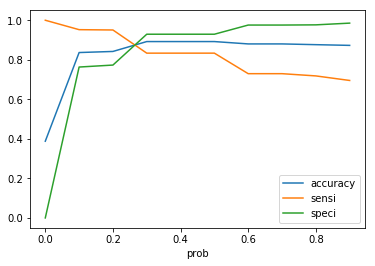

In [157]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above,the three curves are intersecting ~0.30 taking it as cutoff probability.

In [158]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.30 else 0)

y_train_pred_final.head()

,Converted,Converted_Probability,Lead_Score,Predicted_Conversion,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.945245,95.0,1,0.946735,1,1,1,1,1,1,1,1,1,1,1
1,0,0.002687,1.0,0,0.007497,1,0,0,0,0,0,0,0,0,0,0
2,1,0.946619,93.0,1,0.933539,1,1,1,1,1,1,1,1,1,1,1
3,1,0.996674,100.0,1,0.995717,1,1,1,1,1,1,1,1,1,1,1
4,0,0.018116,2.0,0,0.017591,1,0,0,0,0,0,0,0,0,0,0


In [159]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.892129194104735

In [160]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3627,  276],
       [ 412, 2063]], dtype=int64)

In [161]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [162]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8335353535353536

In [163]:
# Let us calculate specificity
TN / float(TN+FP)

0.9292851652574943

In [164]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07071483474250577


In [165]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8820008550662677


In [166]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8979945531072048


### Making predictions on the test set

In [167]:
X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.transform(X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])

In [168]:
X_test = X_test[cols]
X_test.head()

,Do Not Email,Lead Source_Welingak Website,What is your current occupation_Other,Tags_Lost to EINS,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_Worst,Last Notable Activity_SMS Sent
358,0,0,0,0,0,0,1,0,0,0,0
1048,0,0,0,0,0,0,1,0,0,0,0
7525,1,0,0,0,0,0,1,0,0,0,0
1031,0,0,0,0,0,0,0,0,0,0,0
4200,0,0,0,0,0,0,1,0,0,0,1


In [169]:
X_test_sm = sm.add_constant(X_test)

In [170]:
X_test.shape

(2734, 11)

Making predictions on the test set

In [171]:
y_test_pred = res.predict(X_test_sm)

In [172]:
y_test_pred[:10]

358     0.946735
1048    0.946735
7525    0.793209
1031    0.295103
4200    0.995717
5853    0.076614
7606    0.933539
5227    0.076614
4238    0.995717
8336    0.076614
dtype: float64

In [173]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [174]:
# Let's see the head
y_pred_1.head()

,0
358,0.946735
1048,0.946735
7525,0.793209
1031,0.295103
4200,0.995717


In [175]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [176]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [177]:
y_pred_final.head()

,Converted,0
358,1,0.946735
1048,1,0.946735
7525,1,0.793209
1031,0,0.295103
4200,1,0.995717


In [178]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Probability'})

In [179]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Converted_Probability
358,1,0.946735
1048,1,0.946735
7525,1,0.793209
1031,0,0.295103
4200,1,0.995717


In [180]:
y_pred_final['Predicted_Conversion'] = y_pred_final.Converted_Probability.map(lambda x: 1 if x > 0.38 else 0)

In [181]:
y_pred_final['Lead_Score'] =round(y_pred_final['Converted_Probability']*100)

In [182]:
y_pred_final.head()

,Converted,Converted_Probability,Predicted_Conversion,Lead_Score
358,1,0.946735,1,95.0
1048,1,0.946735,1,95.0
7525,1,0.793209,1,79.0
1031,0,0.295103,0,30.0
4200,1,0.995717,1,100.0


In [183]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Predicted_Conversion)

0.8884418434528164

In [184]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Predicted_Conversion)
confusion2

array([[1571,  131],
       [ 174,  858]], dtype=int64)

In [185]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [186]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8313953488372093

In [187]:
# Let us calculate specificity
TN / float(TN+FP)

0.9230317273795534

## Checking Conversion % 

**Using the model the cutoff score has to be decided the which company can employ to identify the hot leads. And in those identified Hot leads it can get conversion rate of minimum 80%*

In [188]:
y_train_pred_final.head(2)

,Converted,Converted_Probability,Lead_Score,Predicted_Conversion,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.945245,95.0,1,0.946735,1,1,1,1,1,1,1,1,1,1,1
1,0,0.002687,1.0,0,0.007497,1,0,0,0,0,0,0,0,0,0,0


In [189]:
df_train=y_train_pred_final[['Converted','Lead_Score','Predicted_Conversion']]

In [190]:
y_pred_final.head()

,Converted,Converted_Probability,Predicted_Conversion,Lead_Score
358,1,0.946735,1,95.0
1048,1,0.946735,1,95.0
7525,1,0.793209,1,79.0
1031,0,0.295103,0,30.0
4200,1,0.995717,1,100.0


In [191]:
df_test=y_pred_final[['Converted','Lead_Score','Predicted_Conversion']]

In [192]:
df_train.shape

(6378, 3)

In [193]:
df_test.shape

(2734, 3)

In [194]:
df=pd.concat([df_train,df_test])

In [195]:
df.shape

(9112, 3)

In [196]:
df.head()

,Converted,Lead_Score,Predicted_Conversion
0,1,95.0,1
1,0,1.0,0
2,1,93.0,1
3,1,100.0,1
4,0,2.0,0


**At value 38, desired Converison of >80% ie that  is obtained, hence cutoff Lead score is chosen as 38.**

In [218]:
df_optimal_conversion=df[df['Lead_Score']>=32]

In [219]:
df_optimal_conversion.shape

(3328, 3)

In [220]:
conversion_rate=round(100*(df_optimal_conversion['Converted'].sum()/len(df_optimal_conversion.index)))

In [221]:
conversion_rate

88.0

### Conclusion

## Thus, the Lead_Score cutoff has been set at 32. Conversion rate of 88% has been  achieved.Hence it is a good model with accuracy of 88.88%. Thus X Education should try to reach only prospects with Lead score of >=30 to achieve >80% conversion rate. ##